## Custom plotting Bilby results


This notebook plots the results from the Bilby sampler

In [1]:


root = "../data/nested_sampling/"

#path = "../data/nested_sampling/diagonal9_03_result.json"
#path = "../data/nested_sampling/original_params_w_alpha_result.json"

#path = "../data/nested_sampling/original_params_w_alpha_retry_result.json"
#path = "../data/nested_sampling/run_0304a_result.json"


path = root + "canonical_example2_result.json"
path = root + "all_gw_ozstar_result.json"
path = root + "random_walk_ozstar_result.json"

#run_0304d
#run_0304a

In [2]:
import pandas as pd
import json
import corner 

def analysis(path,cols_to_plot):

    # Opening JSON file
    f = open(path)
  
    # returns JSON object as 
    # a dictionary
    data = json.load(f)

    #Make the posterior a dataframe
    df = pd.DataFrame(data["samples"]["content"])

    #Surface median values
    print("Number of posterior samples:")
    print(len(df))
    print("Median values:")
    print(df.median())


    y = df[cols_to_plot].to_numpy()
    fig = corner.corner(y,color='C0',
                        show_titles=True,
                        smooth=True, 
                        smooth1d=True,quantiles=[0.16, 0.84])





In [4]:
#columns = ["phi0_gw","psi_gw","alpha_gw","h"]
columns = ["omega_gw"]


analysis(path,columns)

Number of posterior samples:
410
Median values:
0    3.373878e-07
1    1.945498e-01
2    7.518223e-01
3    6.962695e-03
dtype: float64


KeyError: "None of [Index(['omega_gw'], dtype='object')] are in the [columns]"

In [185]:

#path = root + "alpha_small_prior_result.json"
path = root + "all_gw_ozstar_result.json"
# Opening JSON file
f = open(path)

# returns JSON object as 
# a dictionary
data = json.load(f)

#Make the posterior a dataframe
df1 = pd.DataFrame(data["posterior"]["content"])
df2 = pd.DataFrame(data["samples"]["content"])

In [186]:
df1

,omega_gw,phi0_gw,psi_gw,iota_gw,delta_gw,alpha_gw,h,f00,f01,f02,...,gamma41,gamma42,gamma43,gamma44,gamma45,gamma46,sigma_p,sigma_m,log_likelihood,log_prior
0,4.990158e-07,0.943259,2.498916,0.509849,1.104085,1.237516,0.002156,327.847021,205.530699,303.090979,...,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,1.000000e-13,0.001,1.000000e-10,-23885.300986,10.831972


In [187]:
df2

,0,1,2,3,4,5,6
0,4.990158e-07,0.943259,2.498916,0.509849,1.104085,1.237516,0.002156


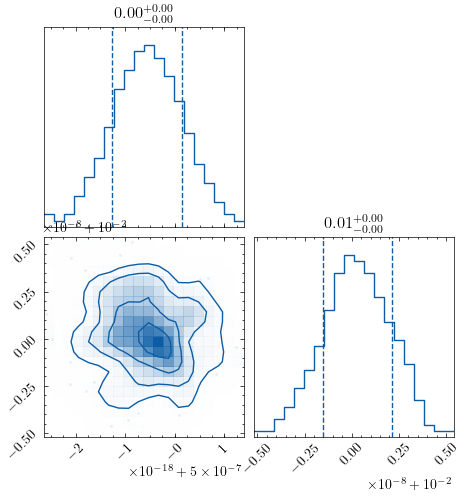

In [164]:
y = df2.to_numpy()
fig = corner.corner(y,color='C0',
                    show_titles=True,
                    smooth=True, 
                    smooth1d=True,quantiles=[0.16, 0.84])

In [163]:
y

array([[5.00000000e-07, 1.00000054e-02],
       [5.00000000e-07, 9.99999538e-03],
       [5.00000000e-07, 9.99999480e-03],
       [5.00000000e-07, 1.00000001e-02],
       [5.00000000e-07, 9.99999762e-03],
       [5.00000000e-07, 1.00000043e-02],
       [5.00000000e-07, 1.00000013e-02],
       [5.00000000e-07, 9.99999873e-03],
       [5.00000000e-07, 9.99999567e-03],
       [5.00000000e-07, 1.00000051e-02],
       [5.00000000e-07, 9.99999996e-03],
       [5.00000000e-07, 1.00000032e-02],
       [5.00000000e-07, 9.99999725e-03],
       [5.00000000e-07, 9.99999956e-03],
       [5.00000000e-07, 9.99999657e-03],
       [5.00000000e-07, 1.00000032e-02],
       [5.00000000e-07, 9.99999595e-03],
       [5.00000000e-07, 9.99999641e-03],
       [5.00000000e-07, 9.99999879e-03],
       [5.00000000e-07, 9.99999607e-03],
       [5.00000000e-07, 1.00000014e-02],
       [5.00000000e-07, 1.00000015e-02],
       [5.00000000e-07, 1.00000044e-02],
       [5.00000000e-07, 1.00000036e-02],
       [5.000000

Number of posterior samples:
269
Median values:
omega_gw          5.000000e-07
h                 1.000000e-02
phi0_gw           2.000000e-01
psi_gw            2.500000e+00
iota_gw           1.000000e+00
                      ...     
gamma46           1.000000e-13
sigma_p           1.000000e-08
sigma_m           1.000000e-10
log_likelihood   -3.490949e+04
log_prior         1.467317e+01
Length: 199, dtype: float64


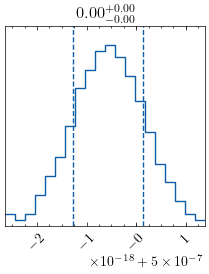

In [153]:

#columns = ["phi0_gw","psi_gw","alpha_gw","h"]
columns = ["omega_gw"]
#path = root + "alpha_small_prior_result.json"

analysis(path,columns)

In [161]:

#columns = ["phi0_gw","psi_gw","alpha_gw","h"]
columns = ["omega_gw"]
#path = root + "alpha_small_prior_result.json"

analysis(path,columns)

Number of posterior samples:
269
Median values:
0    5.000000e-07
1    1.000000e-02
dtype: float64


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [142]:
# Opening JSON file
f = open(path)

# returns JSON object as 
# a dictionary
data = json.load(f)

#Make the posterior a dataframe
df = pd.DataFrame(data["nested_samples"]["content"])

In [141]:
data.keys()

dict_keys(['label', 'outdir', 'sampler', 'log_evidence', 'log_evidence_err', 'log_noise_evidence', 'log_bayes_factor', 'priors', 'posterior', 'injection_parameters', 'meta_data', 'search_parameter_keys', 'fixed_parameter_keys', 'constraint_parameter_keys', 'sampling_time', 'sampler_kwargs', 'use_ratio', 'information_gain', 'log_likelihood_evaluations', 'log_prior_evaluations', 'num_likelihood_evaluations', 'samples', 'nested_samples', 'parameter_labels', 'parameter_labels_with_unit', 'version'])

In [143]:
df

,omega_gw,psi_gw,alpha_gw,h,weights,log_likelihood
0,8.666516e-07,1.156860,0.956230,0.721126,0.000000e+00,-5.041881e+12
1,1.690567e-07,1.571143,1.035594,0.884207,0.000000e+00,-1.738149e+12
2,1.594188e-08,2.391991,0.942953,0.950463,0.000000e+00,-7.283458e+10
3,3.383915e-06,0.314582,1.059136,0.296277,0.000000e+00,-4.921137e+07
4,1.758908e-06,1.702055,1.010461,0.368672,0.000000e+00,-3.086928e+07
...,...,...,...,...,...,...
2397,5.005001e-07,2.512051,0.999441,0.006754,6.055749e-40,-2.288252e+04
2398,5.012712e-07,2.445579,0.996152,0.007771,2.607990e-39,-2.288075e+04
2399,4.999956e-07,2.347588,1.000028,0.009216,1.619438e-24,-2.284653e+04
2400,4.999965e-07,2.577021,1.000019,0.011564,1.632409e-03,-2.279817e+04


In [100]:
df2.var()

omega_gw          1.123250e-44
phi0_gw           2.472114e+00
psi_gw            6.180286e-01
alpha_gw          1.166954e-33
h                 1.222778e-28
                      ...     
gamma46           1.596234e-58
sigma_p           2.494116e-60
sigma_m           0.000000e+00
log_likelihood    1.921576e+00
log_prior         1.222767e-24
Length: 199, dtype: float64

ValueError: It looks like the parameter(s) in column(s) 0 have no dynamic range. Please provide a `range` argument.

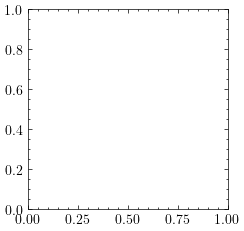

In [73]:

y  = df2[["phi0_gw"]].to_numpy()#,"psi_gw","alpha_gw","delta_gw"]].to_numpy()


fig = corner.corner(y,color='C0',show_titles=True,smooth=True, smooth1d=True,quantiles=[0.16, 0.84])


ValueError: It looks like the parameter(s) in column(s) 0 have no dynamic range. Please provide a `range` argument.

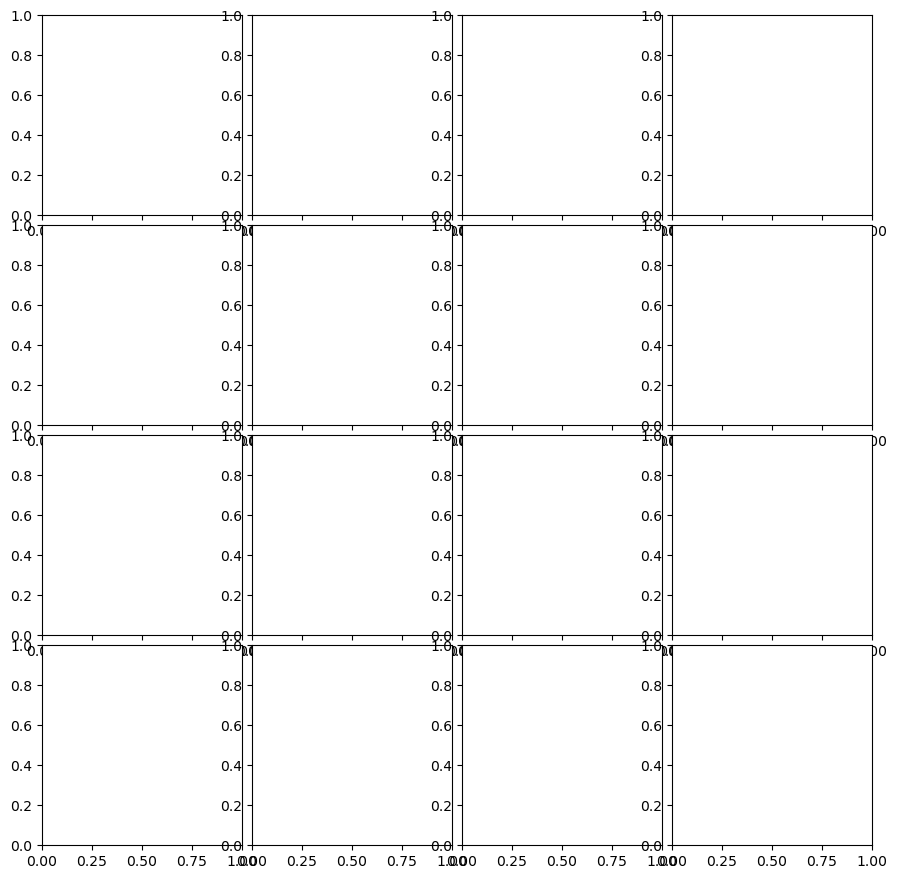

In [32]:
import matplotlib.pyplot as plt 
import corner
labels = [r'$\omega$', r'h']



# r'$\Phi_0$', r'$\psi$', r'$\iota$', r'$\delta$', r'$\alpha$', 'h',
#        r'$\sigma_p$']

truths = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-2,1e-8]


#truths = [3.33,3.33,3.33,3.33,3.33,3.33,3.33,3.33]
truths = [5e-7,1e-2]
axes_scale = ["log", "linear"]#,"linear","linear","linear","linear","linear","linear"]

fig = corner.corner(y,color='C0',show_titles=True,smooth=True, smooth1d=True,labels=labels,truth_color='C1',quantiles=[0.16, 0.84])


#corner.overplot_lines(fig, truths, color="C1")


#plt.savefig("../data/plots/example_corner_plot.png",dpi=300, bbox_inches = "tight")




#fig = corner.corner(y,truths=truths)


In [41]:


import matplotlib.pyplot as plt 
import corner
import scienceplots
import json
import pandas as pd







def plot_custom_corner(path,labels, injection_parameters,axes_scales):


    # Opening JSON file
    f = open(path)
    
    # returns JSON object as 
    # a dictionary
    data = json.load(f)

    #Make it a dataframe. Nice for surfacing
    df = pd.DataFrame(data["samples"]["content"])[[0,1,3]] # posterior
    y = df.to_numpy() 

    print(df.median())

    plt.style.use('science')

    fig = corner.corner(y,
                        color='C0',
                        show_titles=True,
                        smooth=True, 
                        smooth1d=True,
                        labels=labels,
                        truth_color='C2',
                        quantiles=[0.16, 0.84],
                        truths=injection_parameters,
                        axes_scales = axes_scales)
    

    plt.show()



0    5.000000e-07
1    3.341593e+00
3    1.000000e-02
dtype: float64


ValueError: It looks like the parameter(s) in column(s) 0 have no dynamic range. Please provide a `range` argument.

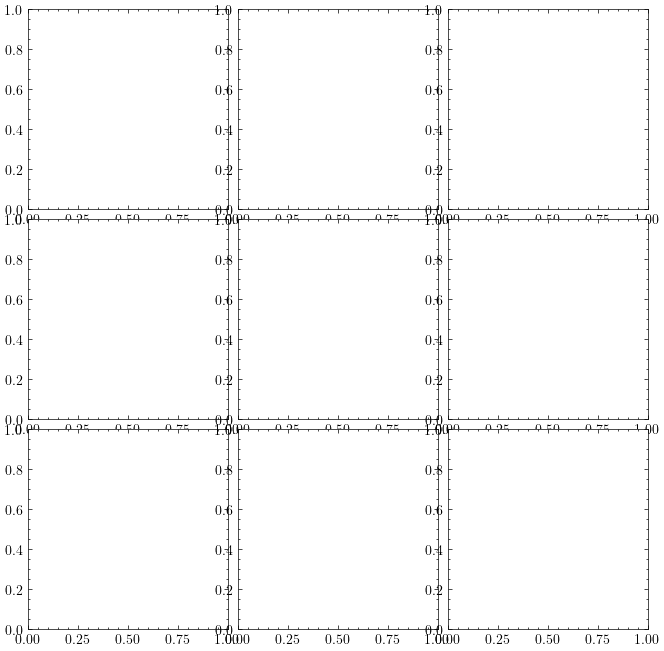

In [42]:
labels = [r'$\omega$', r'h',r'd',r'd']
injection_parameters = [5e-7,1e-2,3.23622243e+10]
axes_scales = ["log", "linear"]
#path = "../data/nested_sampling/diagonal55_result.json"
path = "../data/nested_sampling/original_params_result.json"
plot_custom_corner(path,labels, injection_parameters,axes_scales)

AxesSubplot(0.181818,0.563636;0.363636x0.363636)
AxesSubplot(0.563636,0.563636;0.363636x0.363636)
AxesSubplot(0.181818,0.181818;0.363636x0.363636)
AxesSubplot(0.563636,0.181818;0.363636x0.363636)


(1e-09, 1e-06)

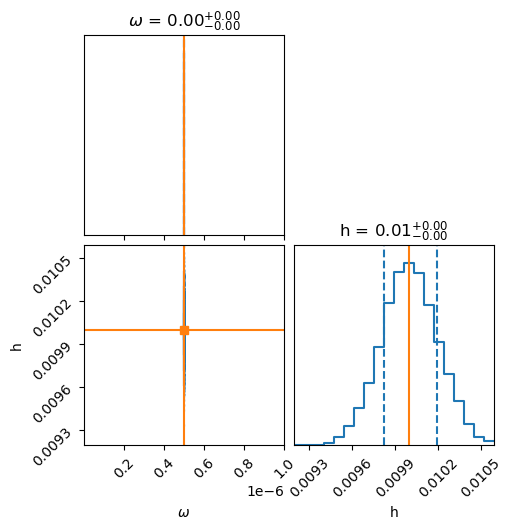

In [30]:





# r'$\Phi_0$', r'$\psi$', r'$\iota$', r'$\delta$', r'$\alpha$', 'h',
#        r'$\sigma_p$']

truths = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-2,1e-8]


#truths = [3.33,3.33,3.33,3.33,3.33,3.33,3.33,3.33]
#,"linear","linear","linear","linear","linear","linear"]



axes = fig.get_axes()



for ax in axes:
    print(ax)
axes[0].set_xlim(1e-9,1e-6)
#axes[1].set_xlim(1e-9,1e-6)
axes[2].set_xlim(1e-9,1e-6)



#corner.overplot_lines(fig, truths, color="C1")


#plt.savefig("../data/plots/example_corner_plot.png",dpi=300, bbox_inches = "tight")




#fig = corner.corner(y,truths=truths)


In [ ]:
import matplotlib.pyplot as plt 
import corner
labels = [r'$\omega$', r'h']



# r'$\Phi_0$', r'$\psi$', r'$\iota$', r'$\delta$', r'$\alpha$', 'h',
#        r'$\sigma_p$']

truths = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-2,1e-8]


#truths = [3.33,3.33,3.33,3.33,3.33,3.33,3.33,3.33]
truths = [5e-7,1e-2]
axes_scale = ["log", "linear"]#,"linear","linear","linear","linear","linear","linear"]

fig = corner.corner(y,color='C0',show_titles=True,smooth=True, smooth1d=True,labels=labels,truth_color='C1',quantiles=[0.16, 0.84],truths=truths)





#corner.overplot_lines(fig, truths, color="C1")


#plt.savefig("../data/plots/example_corner_plot.png",dpi=300, bbox_inches = "tight")




#fig = corner.corner(y,truths=truths)


In [3]:
samples = result.posterior.to_numpy()[:, :7].copy()


samples[:, 0:7] = np.log10(samples[:, 0:7])

labels = ['$log_{10} \\gamma_{\\Omega}$ $[\\rm{s^{-1}}]$', '$log_{10} \\gamma_{Q}$ $[\\rm{s^{-1}}]$', '$log_{10} \\gamma_{S}$ $[\\rm{s^{-1}}]$', '$log_{10} \\gamma_{\\eta}$  $[\\rm{s^{-1}}]$',
                  '$log_{10} \\sigma_{Q}$  $[\\rm{s^{-1/2}}]$', '$log_{10} \\sigma_{S}$  $[\\rm{s^{-1/2}}]$', '$log_{10} \\sigma_{\\eta}$  $[\\rm{s^{-1/2}}]$']

fig = corner(samples, truths=[np.log10(gamma_omega), np.log10(gamma_Q), np.log10(gamma_S), np.log10(gamma_eta), np.log10(sigma_Q), np.log10(sigma_S), np.log10(sigma_eta)],
                     range = [(-14, -8), (-8, -5), (-8, -5), (-8, -5), (-8, -3), (-8, -3), (-8, -3)],
                     color='b', smooth=True, smooth1d=True, levels=[1-np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9/2)])

axarr = np.reshape(fig.axes, (len(labels), len(labels)))
for ii, label in enumerate(labels):
            axarr[ii,ii].set_title(label, fontsize=18)
            axarr[ii,0].yaxis.set_tick_params(labelsize=15)


            
for ax in axarr[-1, :]:
            ax.xaxis.set_tick_params(labelsize=14)

{'mass_1': 36.0,
 'mass_2': 29.0,
 'a_1': 0.4,
 'a_2': 0.3,
 'tilt_1': 0.5,
 'tilt_2': 1.0,
 'phi_12': 1.7,
 'phi_jl': 0.3,
 'luminosity_distance': 2000.0,
 'theta_jn': 0.4,
 'psi': 2.659,
 'phase': 1.3,
 'geocent_time': 1126259642.413,
 'ra': 1.375,
 'dec': -1.2108}

In [14]:
import numpy as np
import corner 
ndim, nsamples = 2, 10000
np.random.seed(42)
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])

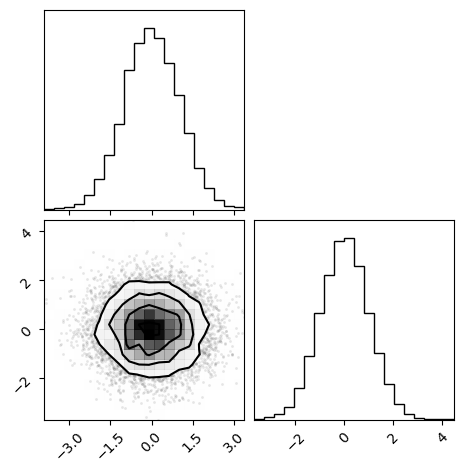

In [31]:
ndim, nsamples = 2, 10000
np.random.seed(42)
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])
figure = corner.corner(samples)

In [45]:

labels = ['$log_{10} \\gamma_{\\Omega}$ $[\\rm{s^{-1}}]$', '$log_{10} \\gamma_{Q}$ $[\\rm{s^{-1}}]$', '$log_{10} \\gamma_{S}$ $[\\rm{s^{-1}}]$', '$log_{10} \\gamma_{\\eta}$  $[\\rm{s^{-1}}]$',
                  '$log_{10} \\sigma_{Q}$  $[\\rm{s^{-1/2}}]$', '$log_{10} \\sigma_{S}$  $[\\rm{s^{-1/2}}]$', '$log_{10} \\sigma_{\\eta}$  $[\\rm{s^{-1/2}}]$']


for ii, label in enumerate(labels):
            print(ii, label)

0 $log_{10} \gamma_{\Omega}$ $[\rm{s^{-1}}]$
1 $log_{10} \gamma_{Q}$ $[\rm{s^{-1}}]$
2 $log_{10} \gamma_{S}$ $[\rm{s^{-1}}]$
3 $log_{10} \gamma_{\eta}$  $[\rm{s^{-1}}]$
4 $log_{10} \sigma_{Q}$  $[\rm{s^{-1/2}}]$
5 $log_{10} \sigma_{S}$  $[\rm{s^{-1/2}}]$
6 $log_{10} \sigma_{\eta}$  $[\rm{s^{-1/2}}]$


In [168]:
import pickle

# open a file, where you stored the pickled data
file = open('../data/nested_sampling/all_bar_one_resume2.pickle', 'rb')

# dump information to that file
data = pickle.load(file)

In [169]:
data

In [170]:
import bilby 

In [172]:
sampler = bilby.sampler.restore(data)


AttributeError: module 'bilby.core.sampler' has no attribute 'restore'

In [ ]:
injection_parameters = dict(
    omega_gw=5e-7,
    phi0_gw=0.20,
    psi_gw=2.50,
    iota_gw=1.0,
    delta_gw=1.0,
    alpha_gw=1.0,
    h=1e-2,
    f0=327.8470205611185,
    fdot=-1.227834e-15,
    distance=181816860005.41092,
    gamma=1e-13,
    sigma_p=1e-8,
    sigma_m=1e-08
)

samples = result.samples
labels = result.parameter_labels
fig = corner.corner(samples, labels=labels)
plt.show()
plt.close()